# Implementation of ANN using Keras:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [ ]:
# Checking version of Tensorflow ans Keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.12.0
Keras Version 2.12.0


In [ ]:
os.getcwd()

'/content'

# GPU / CPU Check

In [ ]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
check_list = ['GPU','CPU']

for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out) > 0:
    print(f"{device} is available!")
    print(f"Details >> {out}")
  else:
    print(f"{device} isn't available!")

GPU is available!
Details >> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available!
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


# Creating a simple classifier using keras on MNIST data

In [ ]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(f"data type of X_train_full: {X_train_full.dtype},\n shape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
 shape of X_train_full: (60000, 28, 28)


In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_train_full[0].shape

(28, 28)

In [ ]:
len(X_test[1][0])

28

In [ ]:
# create a validation data set from the full training data
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.


In [ ]:
#TRAIN-55000
#TEST-10000
#VAL-5000

In [ ]:
len(X_train_full[5000:] )

55000

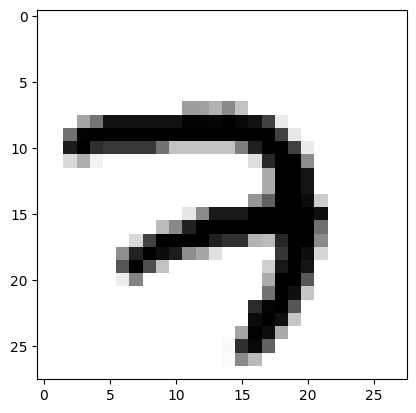

In [ ]:
# Lets view some data
plt.imshow(X_train[0], cmap="binary")
plt.show()

<Axes: >

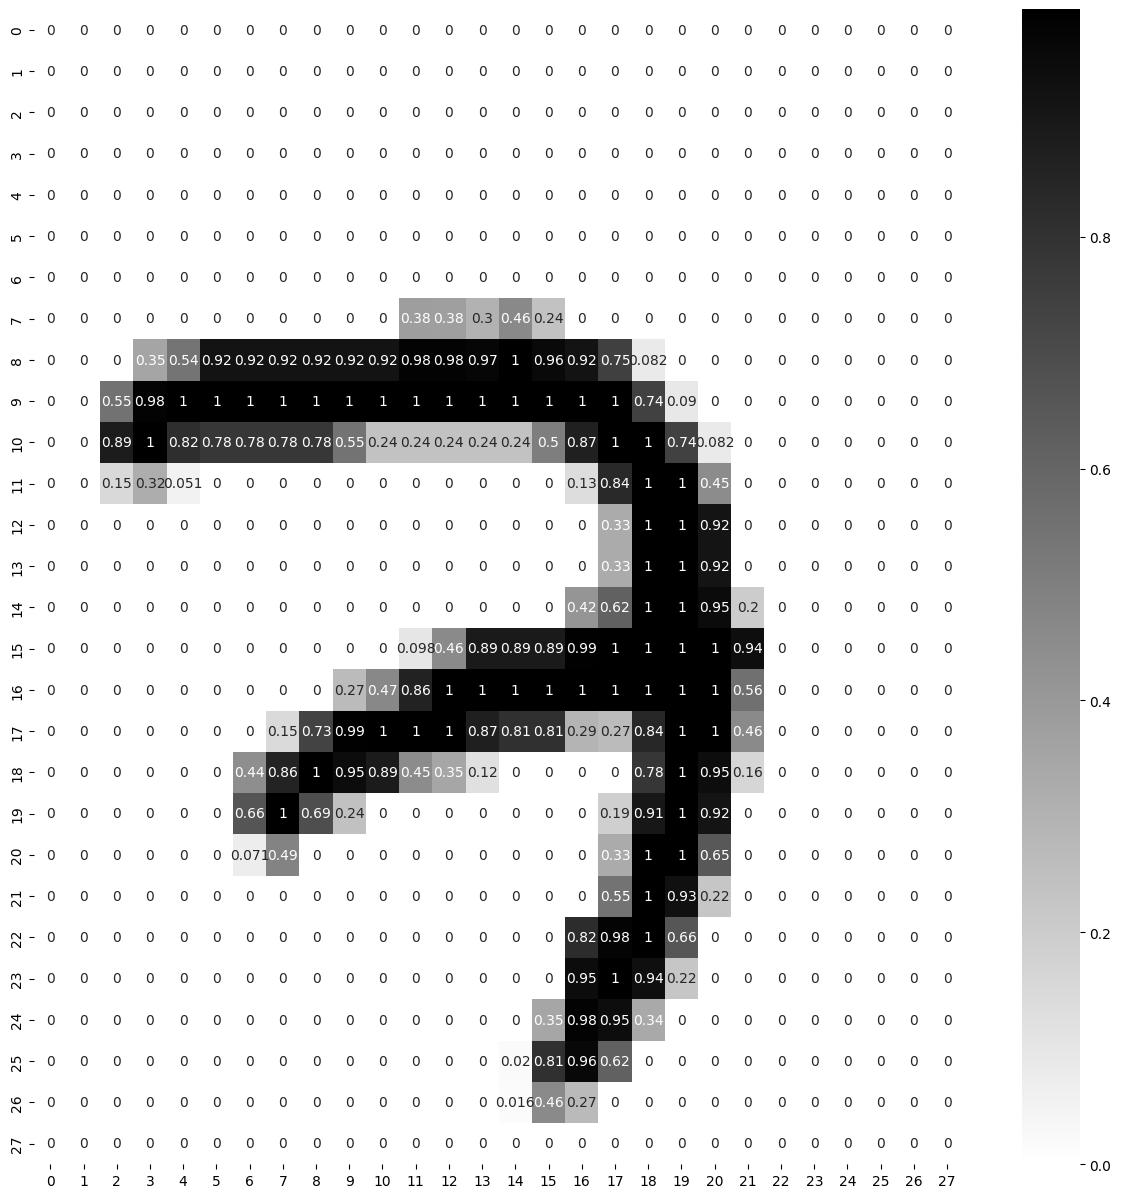

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

# Architecture Used:
<img src="https://github.com/entbappy/Branching-tutorial/blob/master/9.png?raw=true"
width="500"
height="300">

In [ ]:
# Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

In [ ]:
model_clf.layers

In [ ]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# first Layer * second Layer + bias
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [ ]:
# Total parameters to be trained
sum((235500, 30100, 1010))

266610

In [ ]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [ ]:
len(hidden1.get_weights()[1])

300

In [ ]:
hidden1.get_weights()

[array([[-0.06860062,  0.00555266, -0.05386704, ..., -0.06002099,
         -0.04592284,  0.03142449],
        [ 0.04654184, -0.03766961, -0.07177527, ...,  0.03150664,
         -0.02303652,  0.06898552],
        [ 0.0177847 ,  0.03330241,  0.06114225, ..., -0.02598314,
         -0.06467088,  0.0167023 ],
        ...,
        [ 0.06467985, -0.03195457,  0.01876166, ...,  0.05674352,
          0.00652108, -0.03258752],
        [-0.05085257, -0.02898984,  0.00738259, ...,  0.00913606,
          0.04558636,  0.05278066],
        [-0.05150959, -0.01035433, -0.01431886, ...,  0.04995359,
          0.04276002,  0.02179977]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
print("shape\n",weights.shape, "\n")
weights

shape
 (784, 300) 



array([[-0.06860062,  0.00555266, -0.05386704, ..., -0.06002099,
        -0.04592284,  0.03142449],
       [ 0.04654184, -0.03766961, -0.07177527, ...,  0.03150664,
        -0.02303652,  0.06898552],
       [ 0.0177847 ,  0.03330241,  0.06114225, ..., -0.02598314,
        -0.06467088,  0.0167023 ],
       ...,
       [ 0.06467985, -0.03195457,  0.01876166, ...,  0.05674352,
         0.00652108, -0.03258752],
       [-0.05085257, -0.02898984,  0.00738259, ...,  0.00913606,
         0.04558636,  0.05278066],
       [-0.05150959, -0.01035433, -0.01431886, ...,  0.04995359,
         0.04276002,  0.02179977]], dtype=float32)

In [ ]:
print("shape\n", biases.shape)

shape
 (300,)


In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


In [ ]:
# training

EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)


Epoch 1/30
1719/1719 [==============================] - 17s 6ms/step - loss: 0.5777 - accuracy: 0.8490 - val_loss: 0.2989 - val_accuracy: 0.9178
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2856 - accuracy: 0.9179 - val_loss: 0.2369 - val_accuracy: 0.9374
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2342 - accuracy: 0.9329 - val_loss: 0.1984 - val_accuracy: 0.9446
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2011 - accuracy: 0.9427 - val_loss: 0.1755 - val_accuracy: 0.9540
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1755 - accuracy: 0.9502 - val_loss: 0.1631 - val_accuracy: 0.9570
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1560 - accuracy: 0.9554 - val_loss: 0.1425 - val_accuracy: 0.9620
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1395 - accuracy: 0.9601 - val_loss: 0.1327 - val_accuracy

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.577746,0.849000,0.298862,0.9178
1,0.285648,0.917945,0.236939,0.9374
2,0.234230,0.932855,0.198432,0.9446
3,0.201139,0.942691,0.175539,0.9540
4,0.175544,0.950164,0.163081,0.9570
5,0.156015,0.955382,0.142481,0.9620
6,0.139462,0.960127,0.132722,0.9634
7,0.125874,0.964418,0.124970,0.9672
8,0.114341,0.967945,0.113146,0.9698
9,0.104780,0.970891,0.110651,0.9704


<Axes: >

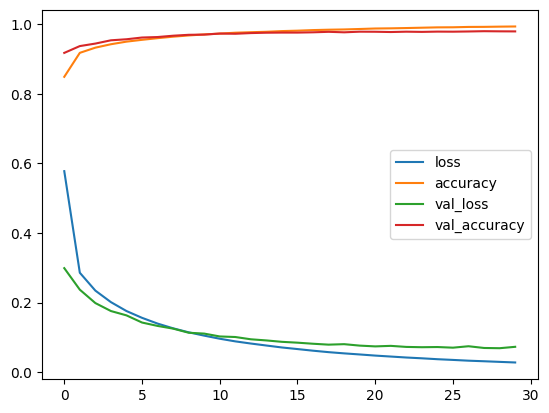

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0712 - accuracy: 0.9782


[0.07124363631010056, 0.9782000184059143]

SAMPLE CHECK: TEST DATA

In [ ]:
x_new = X_test[:3]
# x_new

In [ ]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

In [ ]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 [==============================] - 0s 78ms/step


array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.999, 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.998, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   ,
        0.   ]], dtype=float32)

In [ ]:
y_prob

array([[2.70442320e-06, 7.26091343e-07, 8.06497774e-05, 1.25774450e-03,
        1.97258405e-08, 2.07745330e-07, 8.72846760e-12, 9.98631895e-01,
        2.07095422e-06, 2.39521523e-05],
       [2.43601477e-07, 1.20279765e-05, 9.99933600e-01, 4.58390059e-05,
        7.45308708e-13, 2.22228618e-06, 5.32965771e-07, 1.46304979e-13,
        5.52893107e-06, 8.51930993e-13],
       [2.24215455e-06, 9.98331130e-01, 1.66060127e-04, 5.73281213e-05,
        2.48060620e-04, 1.64327721e-05, 3.50007613e-05, 6.88120897e-04,
        4.40113741e-04, 1.54562531e-05]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_prob, axis = -1)

In [ ]:
y_pred

array([7, 2, 1])

In [ ]:
actual

array([7, 2, 1], dtype=uint8)

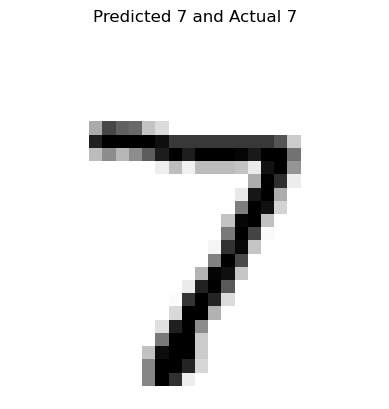

######################


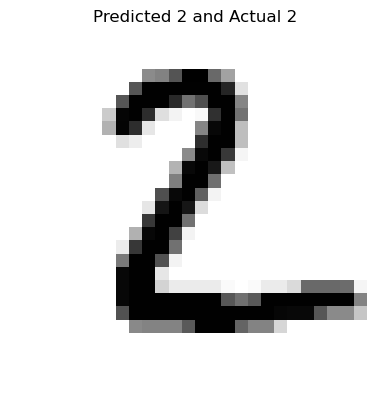

######################


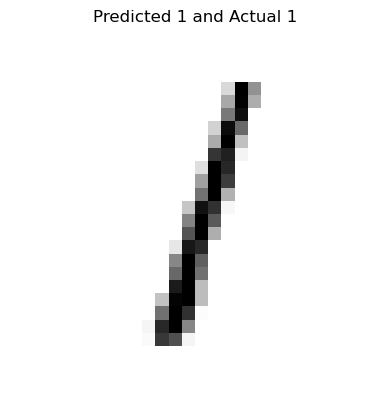

######################


In [ ]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("######################")